In [1]:
import os.path as path_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = 'data'
submit_path = 'submits'
seed = 110894

In [4]:
df_third_group_sku = pd.read_csv(path_.join(data_path, 'third_group_sku.csv'))
df_third_group_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          2781 non-null   object 
 1   SKU            2781 non-null   int64  
 2   price_per_sku  2781 non-null   float64
 3   num_purchases  2781 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 87.0+ KB


In [5]:
df_third_group_sku['dates'] = pd.to_datetime(df_third_group_sku['dates'])

In [6]:
df_conc = pd.read_csv(path_.join(data_path, 'conc_df.csv'))
df_conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SKU            3009 non-null   int64  
 1   year           3009 non-null   int64  
 2   week_num       3009 non-null   int64  
 3   ret_net_code   3009 non-null   int64  
 4   price_per_sku  3009 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 117.7 KB


In [7]:
df_third_group_sku['SKU'].nunique(), df_third_group_sku['SKU'].unique()

(10,
 array([11050, 19632, 24125, 49661, 54404, 60870, 80308, 80631, 84395,
        89272]))

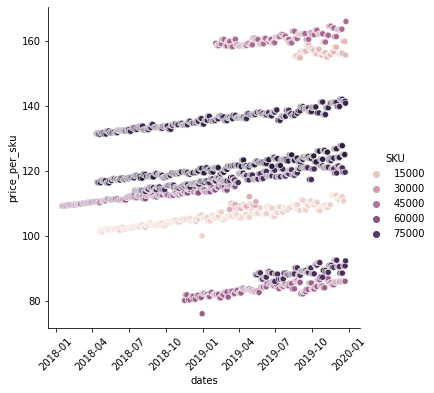

In [7]:
_ = sns.relplot(x='dates', y='price_per_sku', hue='SKU', data=df_third_group_sku)
_ = plt.xticks(rotation=45)

In [8]:
df_third_group_sku['year'] = df_third_group_sku['dates'].dt.year
df_third_group_sku['week_num'] = df_third_group_sku['dates'].dt.isocalendar().week.astype(int)

In [9]:
(
    df_conc
    .groupby('SKU', as_index=False)
    .agg({'price_per_sku': 'count'})
    .rename(columns={'price_per_sku': 'conc_rows_count'})
    .to_csv(
        path_.join(submit_path, 'third_sku_competitor_count.csv'),
        index=False,
    )
)

In [10]:
df_grouped = (
    df_conc
    .groupby(by=['SKU', 'year', 'week_num'], as_index=False)
    .agg({'price_per_sku': 'min'})
    .rename(columns={'price_per_sku': 'min_price_per_sku_conc'})
)
df_grouped.head()

,SKU,year,week_num,min_price_per_sku_conc
0,11050,2019,1,101.25600
1,11050,2019,2,103.45370
2,11050,2019,3,100.35456
3,11050,2019,4,101.91360
4,11050,2019,5,101.26848


In [11]:
(
    df_third_group_sku
    .merge(df_grouped, on=['SKU', 'year', 'week_num'])
    .assign(flag=lambda X: X['price_per_sku'].le(X['min_price_per_sku_conc']).astype(int))
    .groupby('SKU', as_index=False)
    .agg({'flag': 'sum'})
    .rename(columns={'flag': 'lowest_price_rows_count'})
    .to_csv(
        path_.join(submit_path, 'third_sku_le_price.csv'),
        index=False,
    )
)